# 04 Reading bar graphs movies

In [1]:
%%html
<iframe width="700" height="400" src="https://www.youtube.com/embed/R48KimqkYTA/" frameborder="0" allowfullscreen></iframe>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

In [5]:
import findspark

findspark.init()
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

spark = SparkSession.builder.appName("statistics").master("local").getOrCreate()

[khanacademy](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/xfb5d8e68:categorical-variable-graphs/v/more-solving-problems-with-bar-graphs?modal=1)


![Reading bar graphs: movies](./imgs/01-040-01.jpeg)
![Reading bar graphs: movies](./imgs/01-040-02.jpeg)
![Reading bar graphs: movies](./imgs/01-040-03.jpeg)
![Reading bar graphs: movies](./imgs/01-040-04.png)
![Reading bar graphs: movies](./imgs/01-040-05.png)
![Reading bar graphs: movies](./imgs/01-040-06.png)

In [6]:
dataset = {
    'Favorite type of movie': ['Comdey', 'Scary', 'Adenvture', 'Cartoon', 'Mystery'],
    'Number of people' : [20, 6, 10, 10, 16],
}

In [7]:
df = pd.DataFrame(dataset).set_index('Favorite type of movie')
df

Number of people
Favorite type of movie                  
Comdey                                20
Scary                                  6
Adenvture                             10
Cartoon                               10
Mystery                               16

In [8]:
sdf = spark.createDataFrame(zip(*dataset.values()), list(dataset.keys()))
sdf.show()

+----------------------+----------------+
|Favorite type of movie|Number of people|
+----------------------+----------------+
|                Comdey|              20|
|                 Scary|               6|
|             Adenvture|              10|
|               Cartoon|              10|
|               Mystery|              16|
+----------------------+----------------+



In [9]:
df[df['Number of people'] < 14]

Number of people
Favorite type of movie                  
Scary                                  6
Adenvture                             10
Cartoon                               10

In [10]:
sdf[sdf['Number of people'] < 14].show()

+----------------------+----------------+
|Favorite type of movie|Number of people|
+----------------------+----------------+
|                 Scary|               6|
|             Adenvture|              10|
|               Cartoon|              10|
+----------------------+----------------+



<AxesSubplot:xlabel='Favorite type of movie'>

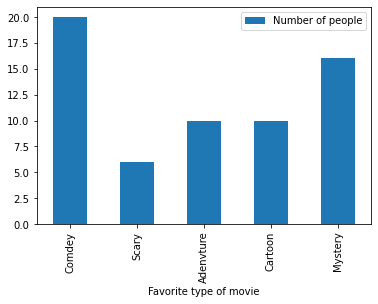

In [11]:
df.plot(kind="bar")

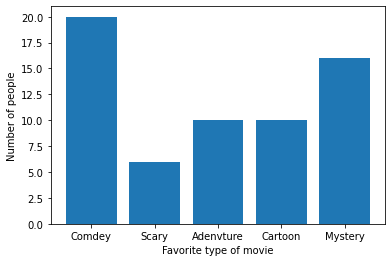

In [12]:
plt.bar(x=dataset['Favorite type of movie'], height=dataset['Number of people'])
plt.xlabel('Favorite type of movie')
plt.ylabel('Number of people')
plt.show()

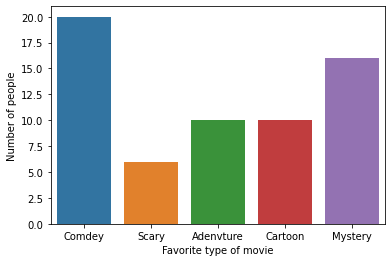

In [13]:
sns.barplot(x=dataset['Favorite type of movie'], y=dataset['Number of people'])
plt.xlabel('Favorite type of movie')
plt.ylabel('Number of people')
plt.show()

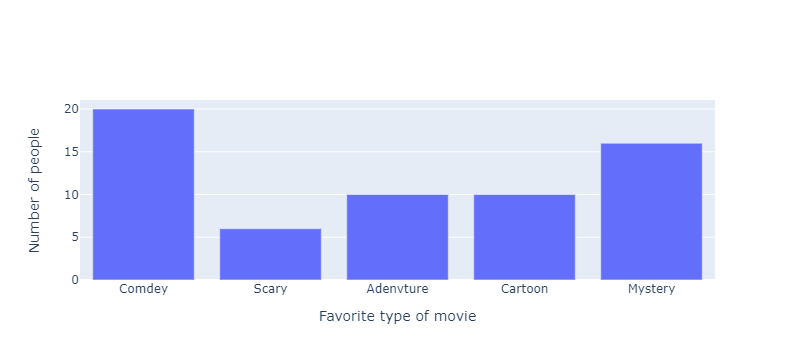

In [14]:
data = [go.Bar(x=dataset['Favorite type of movie'], y=dataset['Number of people'])]
layout = go.Layout(
    xaxis=dict(title='Favorite type of movie'),
    yaxis=dict(title='Number of people')
)
fig = go.Figure(data, layout)
fig.show()

In [70]:
dataset = {
    'Day':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'Dogs': [80, 160, 80, 140, 180]
}

In [71]:
df = pd.DataFrame(dataset).set_index('Day')
df

Dogs
Day            
Monday       80
Tuesday     160
Wednesday    80
Thursday    140
Friday      180

In [72]:
sdf = spark.createDataFrame(zip(*dataset.values()), list(dataset.keys()))
sdf.show()

+---------+----+
|      Day|Dogs|
+---------+----+
|   Monday|  80|
|  Tuesday| 160|
|Wednesday|  80|
| Thursday| 140|
|   Friday| 180|
+---------+----+



In [73]:
sum_of_monday_and_wednesday = df[(df.index == 'Monday') | (df.index == 'Wednesday')]['Dogs'].sum()
df[df['Dogs'] == sum_of_monday_and_wednesday]

Dogs
Day          
Tuesday   160

In [74]:
sum_of_monday_and_wednesday = sdf[(sdf['Day'] == 'Monday') | (sdf['Day'] == 'Wednesday')].groupby('Dogs').sum().collect()[0]['sum(Dogs)']
sdf[sdf['Dogs'] == sum_of_monday_and_wednesday].show()

+-------+----+
|    Day|Dogs|
+-------+----+
|Tuesday| 160|
+-------+----+



<AxesSubplot:xlabel='Day'>

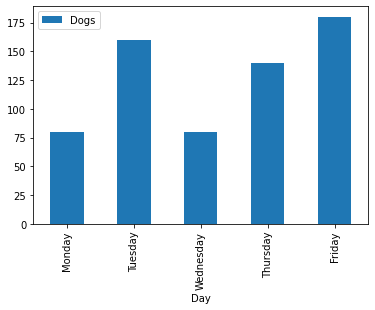

In [75]:
df.plot(kind='bar')

In [76]:
dataset = {
    'Ice cream flavor': ['Vanilla', 'Chocolate', 'Strawberry', 'Cookie dough'],
    'Number of customers': [175, 225, 75, 200]
}

In [77]:
df = pd.DataFrame(dataset).set_index('Ice cream flavor')
df

Number of customers
Ice cream flavor                     
Vanilla                           175
Chocolate                         225
Strawberry                         75
Cookie dough                      200

150

In [78]:
sdf = spark.createDataFrame(zip(*dataset.values()), list(dataset.keys()))
sdf.show()

+----------------+-------------------+
|Ice cream flavor|Number of customers|
+----------------+-------------------+
|         Vanilla|                175|
|       Chocolate|                225|
|      Strawberry|                 75|
|    Cookie dough|                200|
+----------------+-------------------+



In [94]:
df['Number of customers'].max() - df['Number of customers'].min()

150

In [106]:
sdf.groupby().max('Number of customers').collect()[0]['max(Number of customers)'] - sdf.groupby().min('Number of customers').collect()[0]['min(Number of customers)'] 

150